# Exercícios

1. Considere observações independentes de uma distribuição $N(\mu, \sigma^2=5^2)$. Escrever um código que estime $\mu$ numericamente para os dados.

a) 20, 28, 39 DNOMR(C(20, 28, 39))

b) <22, [25,32], >38 PNORM(22), PNORM(32) - PNORM(25), 1-PNORM(38) OU PNORM(38, LOWR=false)

2. Considere observações independentes de uma distribuição $P(\lambda)$ - Poisson. Escrever um código que estime $\lambda$ numericamente para os dados. -----> USAR SLIDES DPOIS PARA A!!!!!!!!!! USAR PPOIS(2) PARA <3

a) 5, 3, 0, 1, 6, 2, 3, 4, 5, 3

b) 5, <3, 0, 1, >4, [1-3], 3, 4, >3, [1-6]

3. Resolver 1(a) e 2(a) por MQO

www.leg.ufpr.br/~paulojus/dsbd

# 1.a. 20, 28, 39

In [1]:
ya <- c(20, 28, 39)

In [2]:
lla <- function(par){
    l1 <- dnorm(20, mean=par, sd=5, log=TRUE)
    l2 <- dnorm(28, mean=par, sd=5, log=TRUE)
    l3 <- dnorm(39, mean=par, sd=5, log=TRUE)
    return(l1+l2+l3)
}

In [3]:
lla(20)

[1] -16.08513

In [4]:
lla(25)

[1] -12.18513

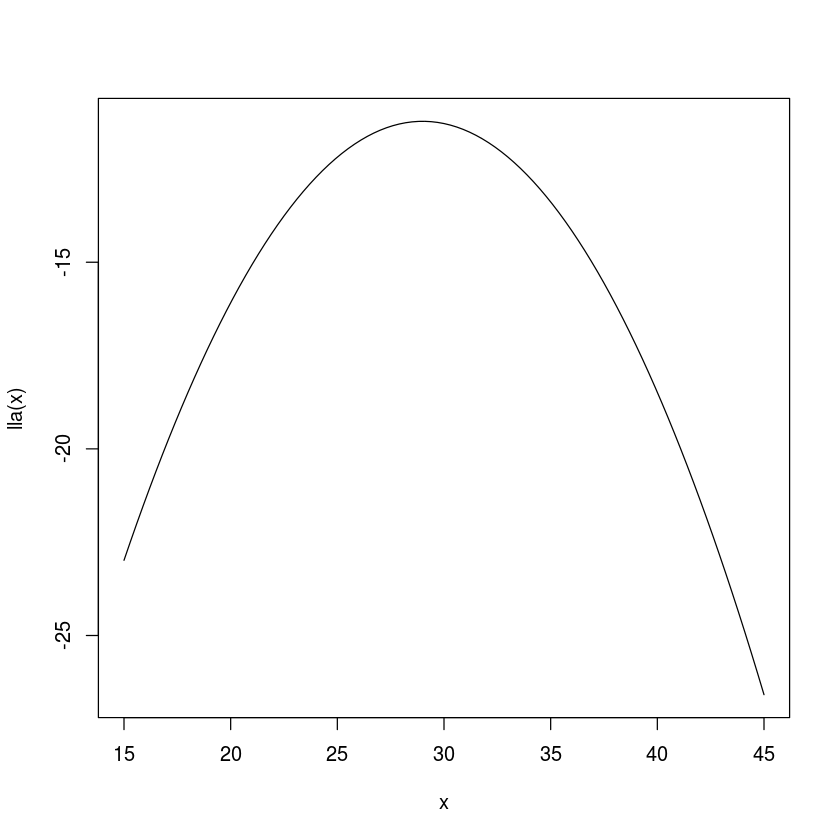

In [5]:
curve(lla, from=15, to=45)

In [6]:
lla <- function(par, y){
    sapply(par, function(x) sum(dnorm(y, mean=x, sd=5, log=TRUE)))
}

In [7]:
llav <- Vectorize(function(par, y){
    sum(dnorm(y, mean=par, sd=5, log=TRUE))
}, "par")

In [8]:
sum(dnorm(ya, mean=20, sd=5, log=T))

[1] -16.08513

In [9]:
lla(20, y=ya)
lla(20:28, y=ya)
llav(20, y=ya)
llav(20:28, y=ya)

[1] -16.08513

[1] -16.08513 -15.06513 -14.16513 -13.38513 -12.72513 -12.18513 -11.76513
[8] -11.46513 -11.28513

[1] -16.08513

[1] -16.08513 -15.06513 -14.16513 -13.38513 -12.72513 -12.18513 -11.76513
[8] -11.46513 -11.28513

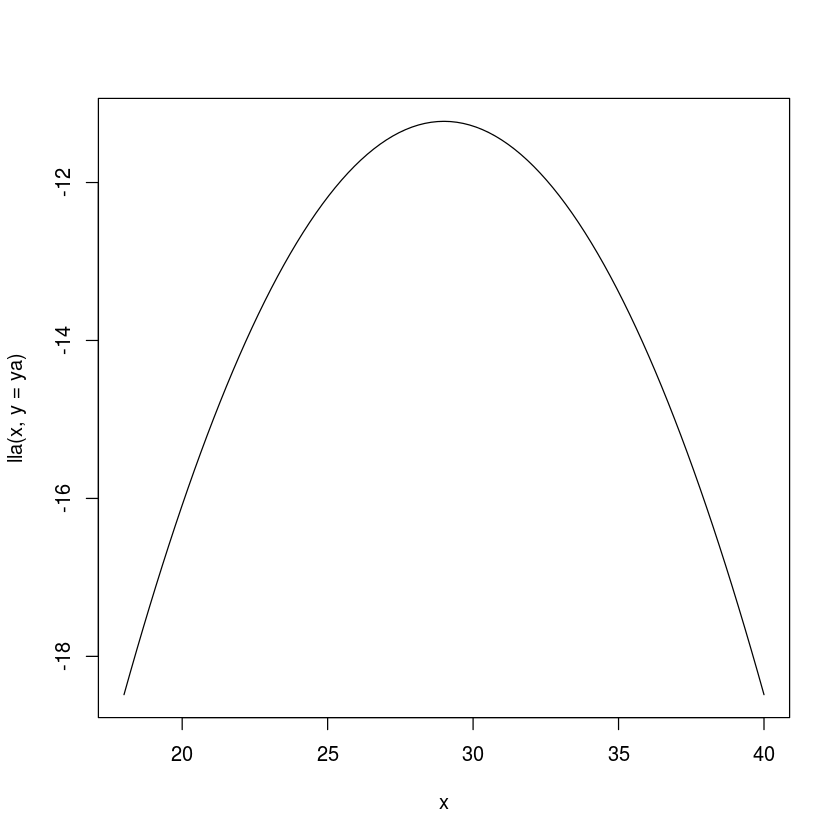

In [10]:
curve(lla(x, y=ya), from=18, to=40)

In [11]:
mean(ya)

[1] 29

In [12]:
est.a <- optimize(lla, interval=c(10,50), y=ya, maximum=TRUE)
est.a

$maximum
[1] 29

$objective
[1] -11.22513

In [13]:
optim(25, lla, y=ya, control=list(fnscale=-1))

Warning message in optim(25, lla, y = ya, control = list(fnscale = -1)):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”

$par
[1] 28.99902

$value
[1] -11.22513

$counts
function gradient 
      24       NA 

$convergence
[1] 0

$message
NULL

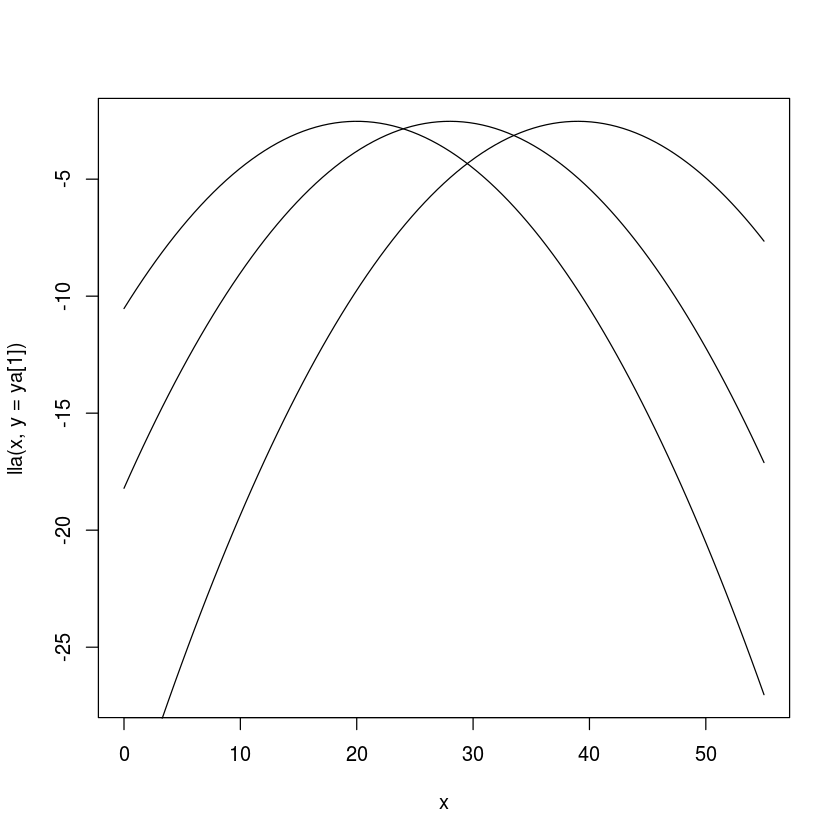

In [14]:
curve(lla(x, y=ya[1]), from=0, to=55)
curve(lla(x, y=ya[2]), from=0, to=55, add=TRUE)
curve(lla(x, y=ya[3]), from=0, to=55, add=TRUE)

# 1.b. <22,  [25-32] , >38

In [15]:
llb <- Vectorize(function(par){
    l1 <- pnorm(22, mean=par, sd=5, log=TRUE)
    l2 <- log(diff(pnorm(c(25,32), mean=par, sd=5)))
    l3 <- pnorm(38, mean=par, sd=5, log=TRUE, lower=FALSE)
    return(l1+l2+l3)
}, "par")

In [16]:
llb(20)

[1] -11.06247

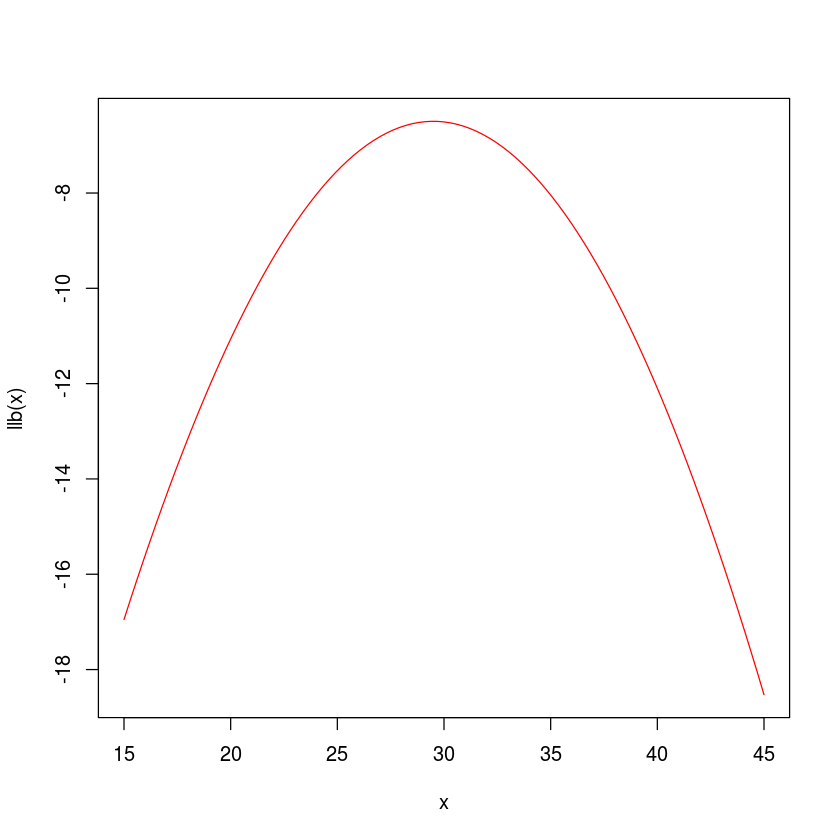

In [17]:
curve(llb, from=15, to=45, col=2)

In [18]:
(est.b <- optimize(llb, interval=c(10,50), maximum=TRUE))

$maximum
[1] 29.50433

$objective
[1] -6.495191

In [19]:
# deviance function
dev.f <- function(par, fun, max.fun, ...){
    -2*(fun(par, ...) - max.fun) 
}

In [20]:
dev.f(25, lla, max.fun=est.a[[2]], y=ya)
dev.f(25, llb, max.fun=est.b[[2]])

[1] 1.92

[1] 2.072604

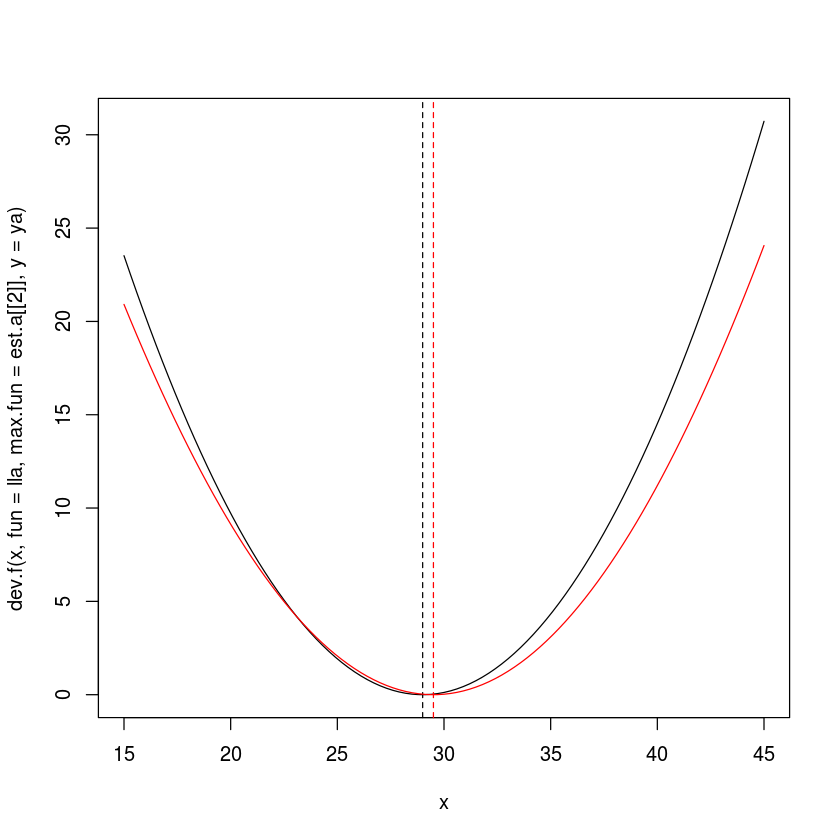

In [21]:
curve(dev.f(x, fun=lla, max.fun=est.a[[2]], y=ya), from=15, to=45)
abline(v=est.a[[1]], lty=2)
curve(dev.f(x, fun=llb, max.fun=est.b[[2]]), from=15, to=45, add=TRUE, col=2)
abline(v=est.b[[1]], lty=2, col=2)

# 1.c. >22,  [25-32] , <38

In [22]:
llc <- Vectorize(function(par){
    l1 <- pnorm(22, mean=par, sd=5, lower=F, log=TRUE)
    l2 <- log(diff(pnorm(c(25,32), mean=par, sd=5)))
    l3 <- pnorm(38, mean=par, sd=5, log=TRUE)
    return(l1+l2+l3)
}, "par")

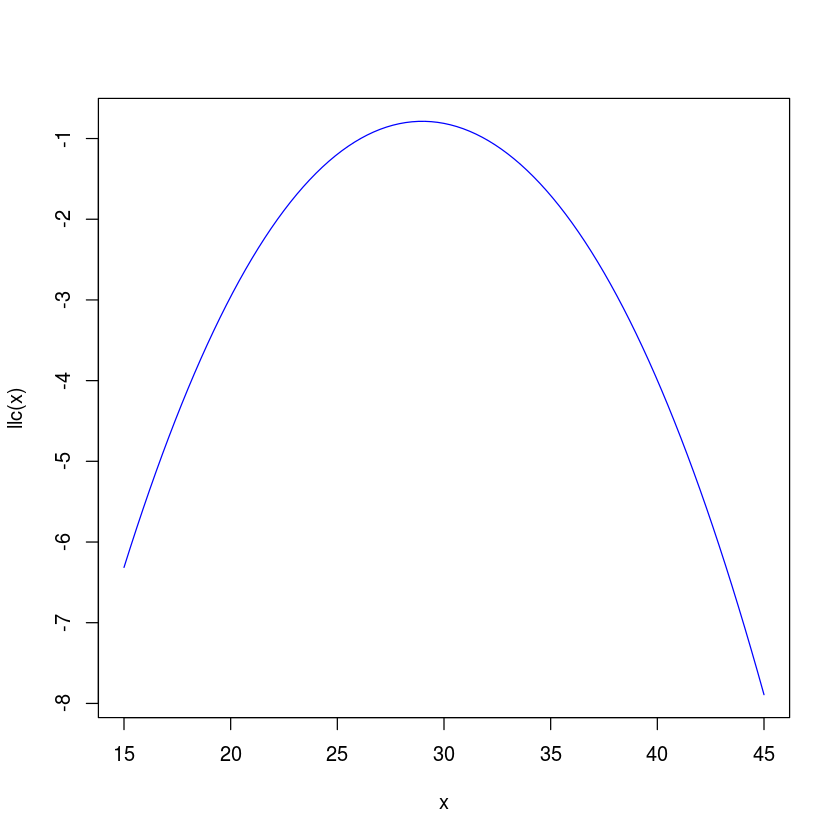

In [23]:
curve(llc, from=15, to=45, col=4)

In [24]:
(est.c <- optimize(llc, interval=c(10,50), maximum=TRUE))

$maximum
[1] 28.98517

$objective
[1] -0.7865337

In [25]:
llint <- Vectorize(function(par, y.p, y.i){
    ## y.p é um vetor de dados pontuais
    ## i.i é uma matriz (n x 2) de dados intervalares
    if(missing(y.p)) ll.p <- 0
    else ll.p <-  sum(dnorm(y.p, mean=par, sd=5, log=TRUE))
    if(missing(y.i)) ll.i <- 0
    else ll.i <- sum(apply(y.i, 1, function(x) log(diff(pnorm(x, mean=par, sd=5)))))
    return(ll.i+ll.p)
}, "par")

In [26]:
yb  <- cbind(c(-Inf, 25, 38), c(22, 32, Inf)) 
yc  <- cbind(c(22, 25, -Inf), c(Inf, 32, 38))

In [27]:
yb

-Inf,22
25,32
38,Inf


In [28]:
lla(25, y=ya)
llint(25, y.p=ya)
llb(25)
llint(25, y.i=yb)
llc(25)
llint(25, y.i=yc)

[1] -12.18513

[1] -12.18513

[1] -7.531492

[1] -7.531492

[1] -1.19453

[1] -1.19453

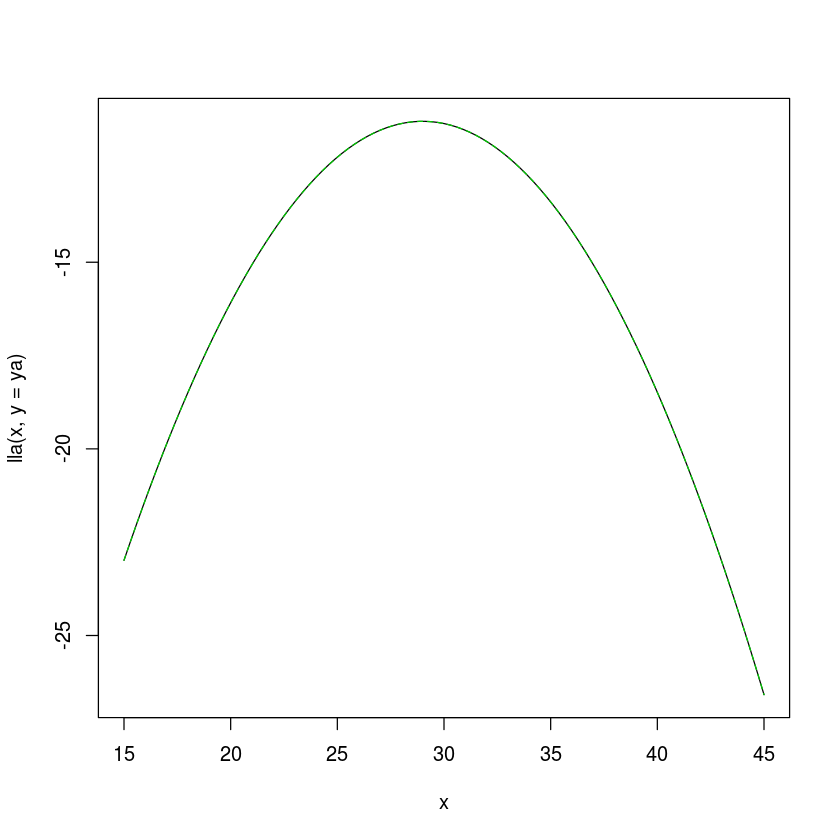

In [29]:
curve(lla(x, y=ya), from=15, to=45)
curve(llint(x, y.p=ya), from=15, to=45, add=TRUE, col=3, lty=2)

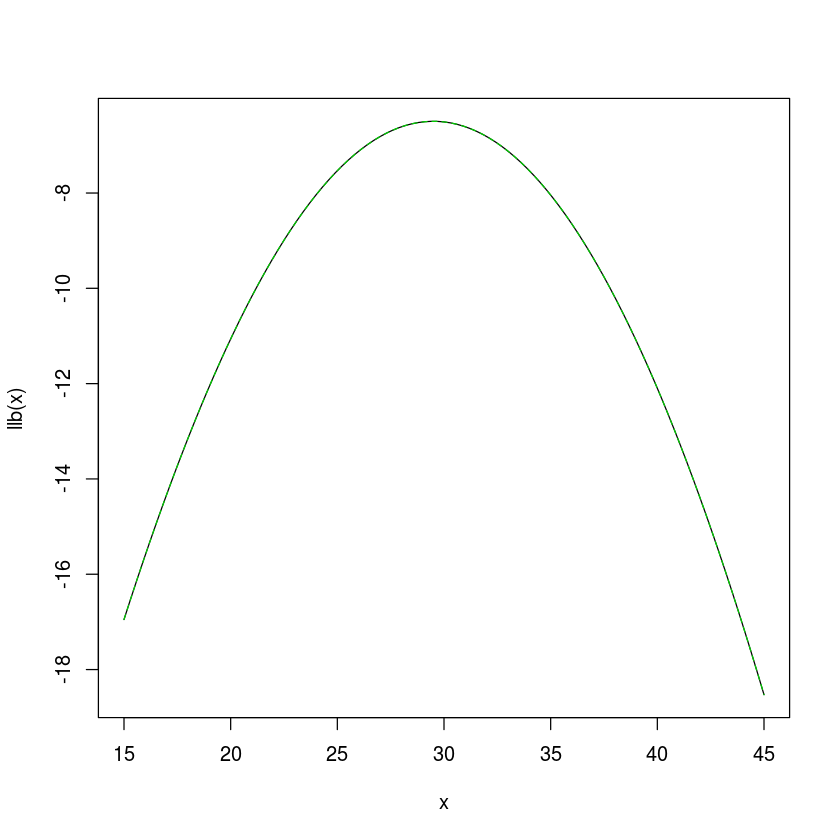

In [31]:
curve(llb, from=15, to=45)
curve(llint(x, y.i=yb), from=15, to=45, col=3, add=TRUE, lty=2)

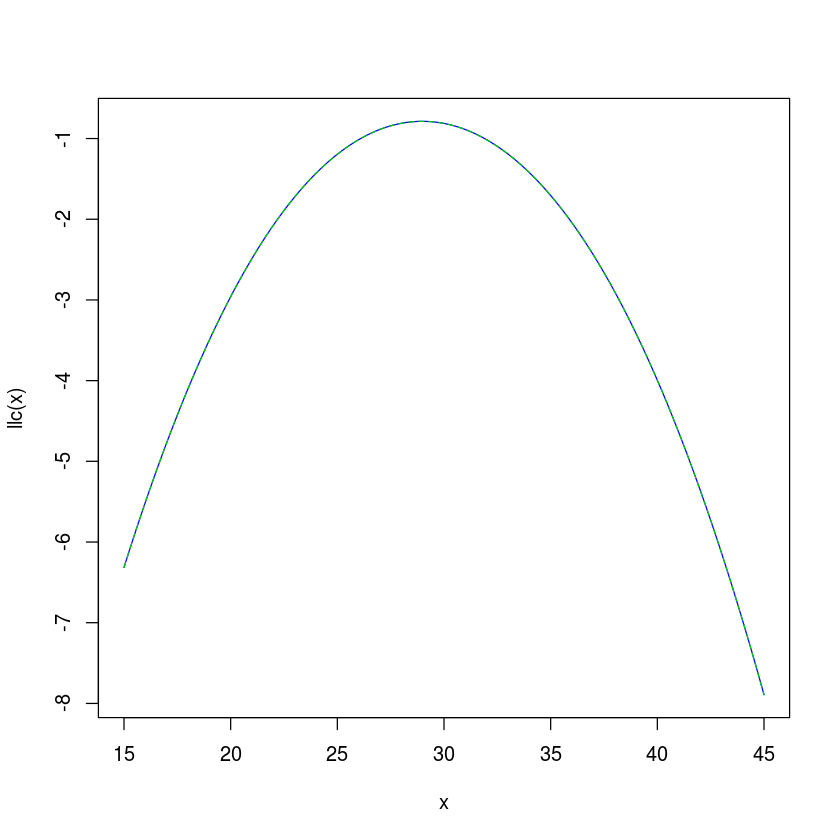

In [35]:
curve(llc, from=15, to=45, col=4)
curve(llint(x, y.i=yc), from=15, to=45, col=3, add=TRUE, lty=2)

In [36]:
optimize(lla, interval=c(10,50), y=ya, maximum=TRUE)
optimize(llint, interval=c(10,50), y.p=ya, maximum=TRUE)

$maximum
[1] 29

$objective
[1] -11.22513

$maximum
[1] 29

$objective
[1] -11.22513

In [37]:
optimize(llb, interval=c(10,50), maximum=TRUE)
optimize(llint, interval=c(10,50), y.i=yb, maximum=TRUE)

$maximum
[1] 29.50433

$objective
[1] -6.495191

$maximum
[1] 29.50433

$objective
[1] -6.495191

In [38]:
optimize(llc, interval=c(10,50), maximum=TRUE)
optimize(llint, interval=c(10,50), y.i=yc, maximum=TRUE)

$maximum
[1] 28.98517

$objective
[1] -0.7865337

$maximum
[1] 28.98517

$objective
[1] -0.7865337

In [39]:
optimize(llint, interval=c(10,50), y.p = ya, y.i=yc, maximum=TRUE)

$maximum
[1] 28.99562

$objective
[1] -12.01167